# À propos du calcul de $\pi$

## En demandant à la lib maths
Mon ordinateur m'indique que $\pi$ vaut *approximativement*

In [1]:
from math import *
print(pi)

3.141592653589793


## En utilisant la méthode des aiguilles de Buffon
Mais calculé avec la __méthode__ des [aiguilles de Buffon](https://fr.wikipedia.org/wiki/Aiguille_de_Buffon), on obtiendrait comme __approximation__ :


In [2]:
import numpy as np
np.random.seed(seed=42)
N = 10000
x = np.random.uniform(size=N, low=0, high=1)
theta = np.random.uniform(size=N, low=0, high=pi/2)
2/(sum((x+np.sin(theta))>1)/N)

3.128911138923655

## Avec un argument "fréquentiel" de surface
Sinon, une méthode plus simple à comprendre et ne faisant pas intervenir d'appel à la fonction sinus se base sur le fait que  si $X\sim U(0,1)$ et $Y\sim U(0,1)$ alors $P[X^2+Y^2\leq 1] = \pi/4$ (voir [méthode de Monte Carlo sur Wikipedia](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Monte-Carlo#D%C3%A9termination_de_la_valeur_de_%CF%80)). Le code suivant illustre ce fait:

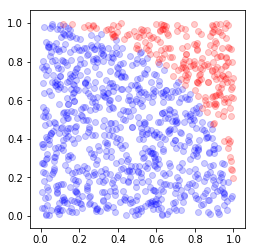

In [3]:
%matplotlib inline  
import matplotlib.pyplot as plt

np.random.seed(seed=42)
N = 1000
x = np.random.uniform(size=N, low=0, high=1)
y = np.random.uniform(size=N, low=0, high=1)

fig, ax = plt.subplots(1)
accept = (x*x+y*y)<=1
insideX,  insideY  = x[accept],y[accept]
outsideX, outsideY = x[np.logical_not(accept)],y[np.logical_not(accept)]

ax.scatter(insideX, insideY, c='b', alpha=0.2, edgecolor=None)
ax.scatter(outsideX, outsideY, c='r', alpha=0.2, edgecolor=None)
ax.set_aspect('equal')
plt.show()

Il est alors aisé d'obtenir une approximation (pas terrible) de $\pi$ en comptant combien de fois, en moyenne, $X^2 + Y^2$ est inférieur à 1:

In [4]:
4*sum(accept)/N

3.112